# SPO - Bike sharing demand

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [36]:
#Učitavanje podataka iz excel tablice
df = pd.read_csv('hour.csv')
df.head(100)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,1,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,0,2,2
96,97,2011-01-05,1,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,0,3,3
97,98,2011-01-05,1,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,0,33,33
98,99,2011-01-05,1,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88


In [37]:
###OPIS STUPACA
#- instant: record index
#	- dteday : date
#	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
#	- yr : year (0: 2011, 1:2012)
#	- mnth : month ( 1 to 12)
#	- hr : hour (0 to 23)
#	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#	- hum: Normalized humidity. The values are divided to 100 (max)
#	- windspeed: Normalized wind speed. The values are divided to 67 (max)
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and registered

In [38]:
#provjerimo dimezije polja
df.shape

(17379, 17)

In [39]:
# statistički opis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [40]:
# provjerimo tipove podataka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
# provjera kako bi vidjeli ima li nepostojećih vrijednosti
df.isnull().sum()
#Rezultat: nema nepostojećih vrijednosti

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

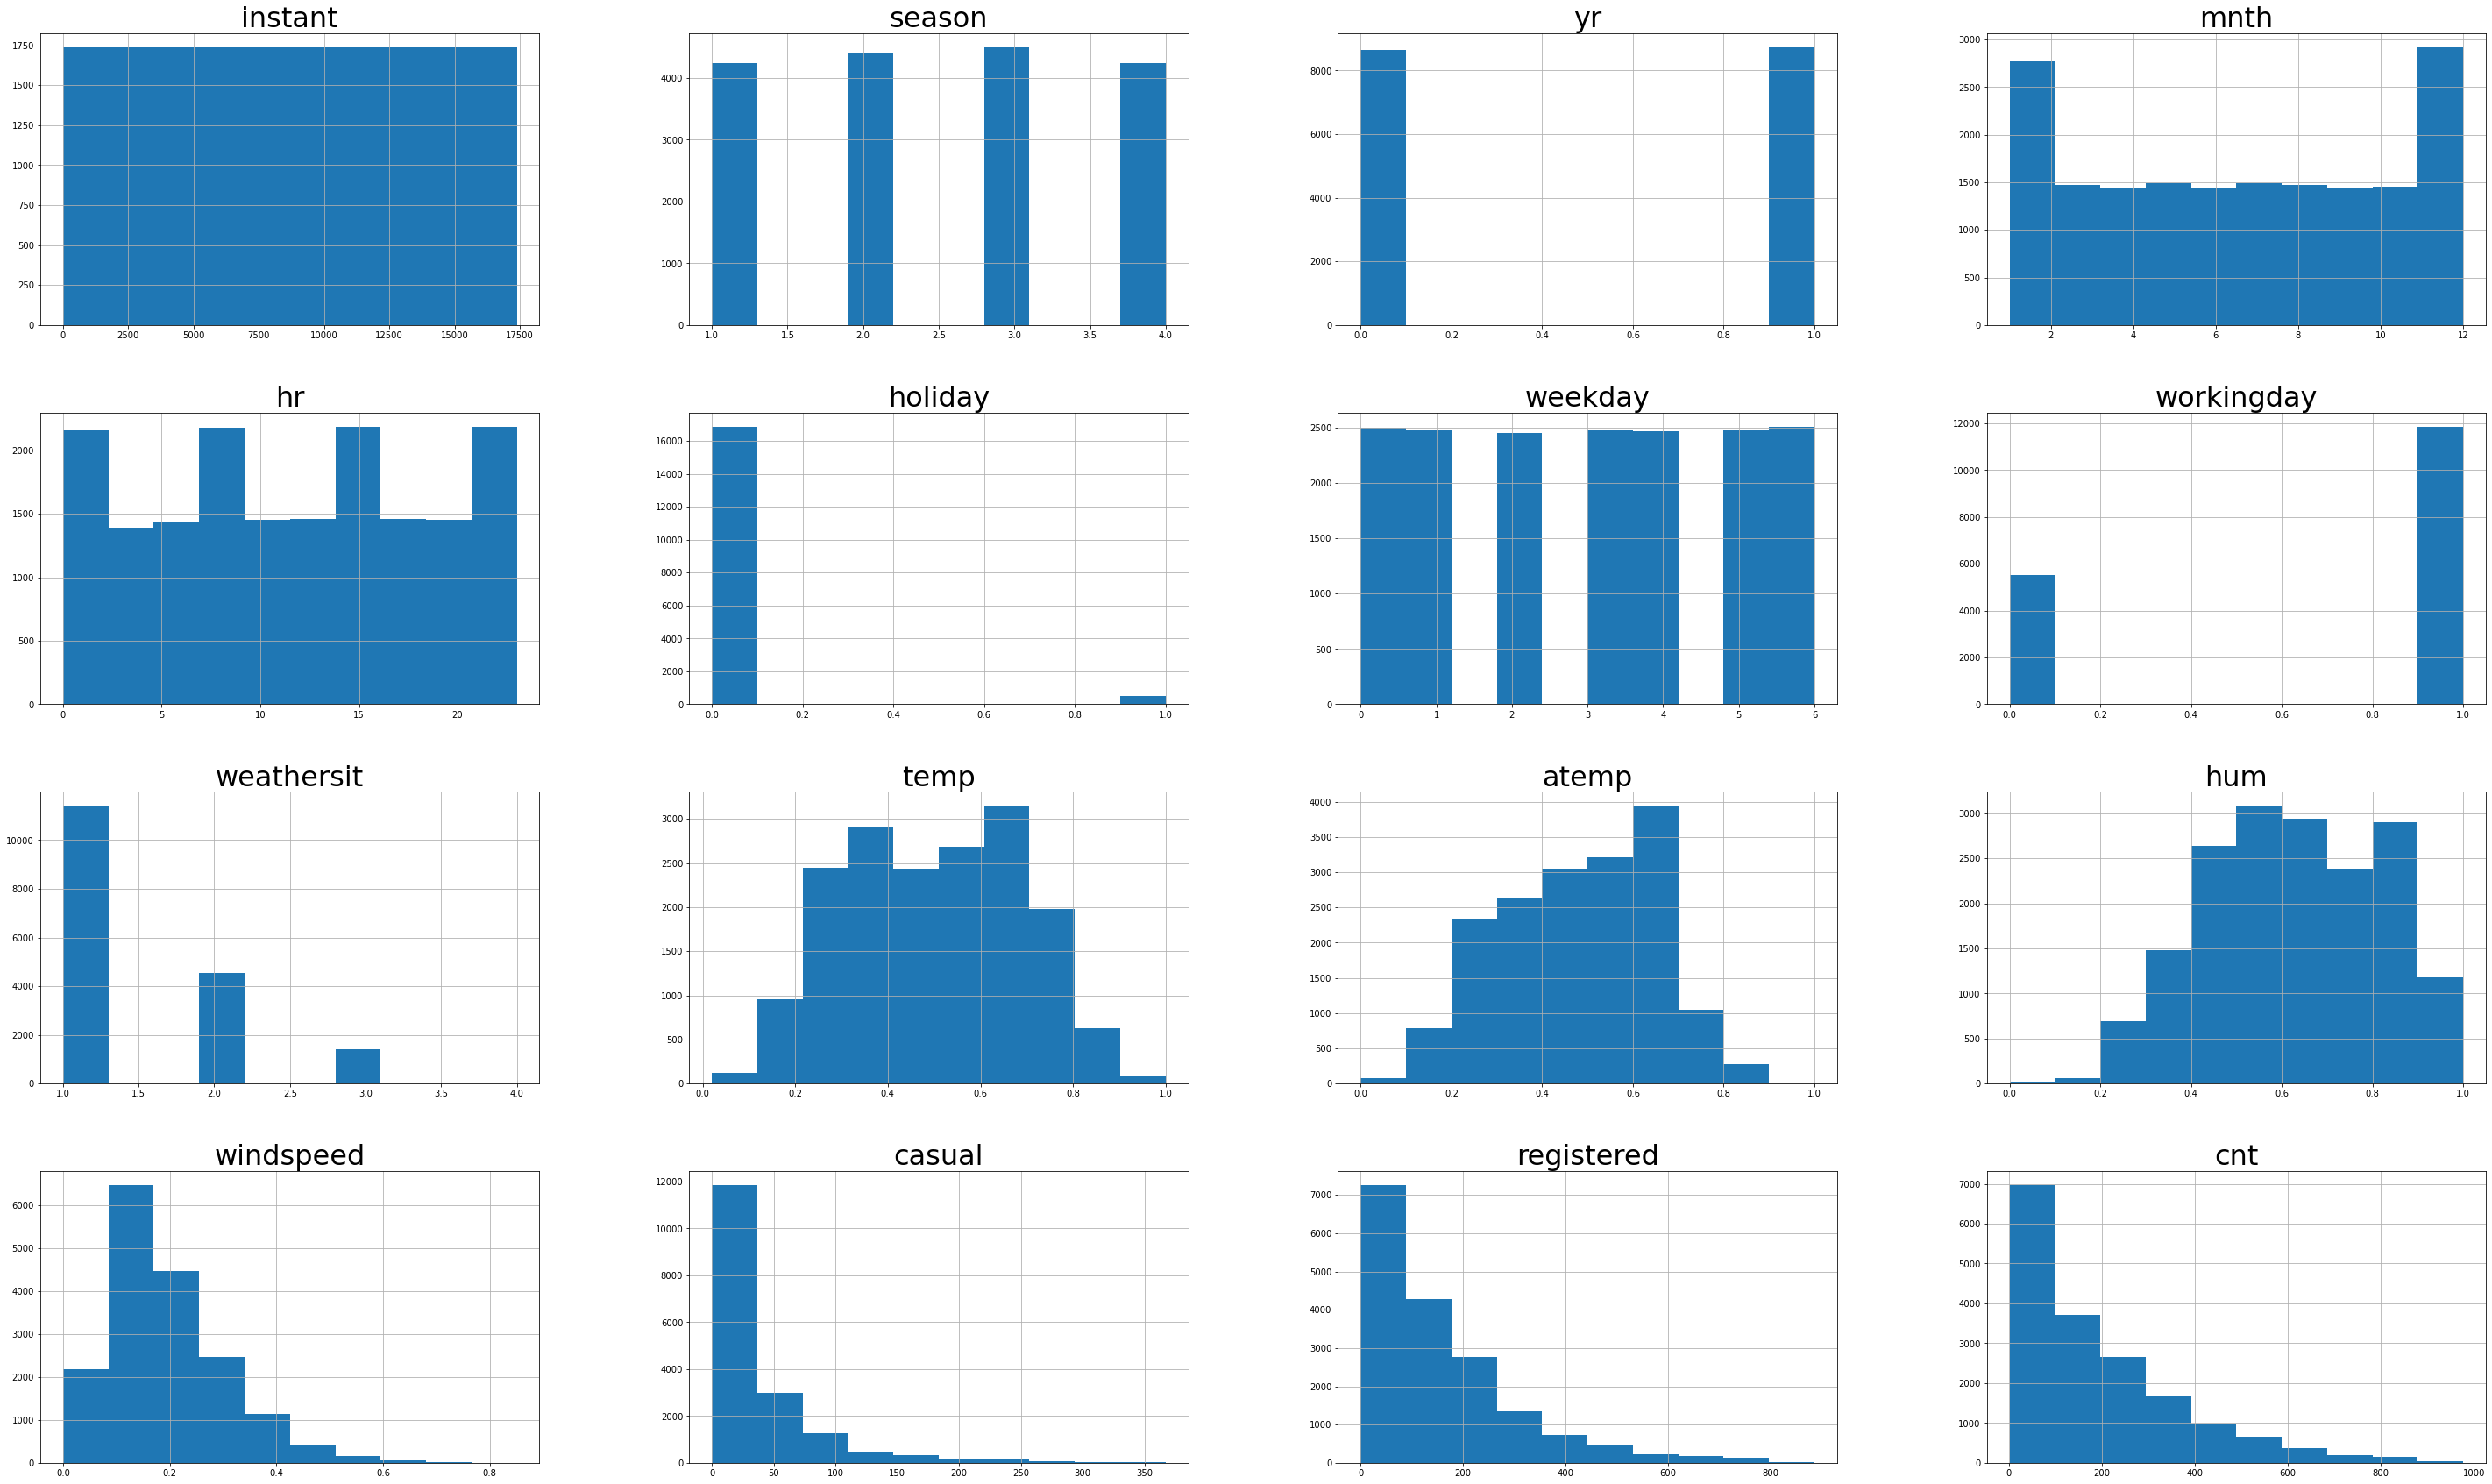

In [42]:
#prikaz histograma
fig = df.hist(figsize=(50, 30))
[x.title.set_size(32) for x in fig.ravel()]

In [43]:
#provjerimo imamo li duplikate
df.duplicated().sum()

0

In [44]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
#možemo obrisati stupce:
#instant (id vrijednosti)
#dteday : imamo zasebne stupce za godinu, mjesec, dan
#casual & registered : broj ljudi koji su unajmili bicikl već se nalazi u cnt stupcu



In [45]:
#ciljna varijabla
#cnt stupac je broj ukupnih korisnika(registriranih i ne registriranih) koji su unajmili bicikl
#izračunata je srednja vrijednost, te oni koji su iznad prosjeka su označeni s ABOVE_A, a oni ispod BELOW_A
m_value = df["cnt"].mean()
df["target"] = "ABOVE_A"
df.loc[df.cnt < m_value, "target"] = "BELOW_A"
df.head(100)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,target
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,BELOW_A
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,BELOW_A
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,BELOW_A
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,BELOW_A
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,BELOW_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,2,BELOW_A
96,1,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,3,BELOW_A
97,1,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,33,BELOW_A
98,1,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,88,BELOW_A


In [46]:
#provjerimo da su samo dvije uniqe vrijednosti 
df.target.describe()

count       17379
unique          2
top       BELOW_A
freq        10444
Name: target, dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
 13  target      17379 non-null  object 
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB


# Distribucija kategoričkih varijabli

<AxesSubplot:xlabel='season'>

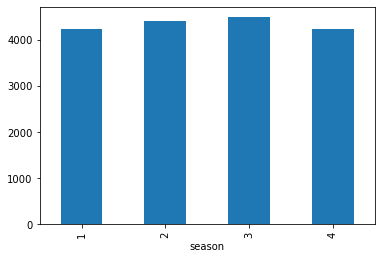

In [48]:
#season (1:spring, 2:summer, 3:fall, 4:winter)
#broj posuđenih bicikala po godišnjem dobu
groupbySeason = df.groupby(by = 'season').size()
groupbySeason.plot.bar()

<AxesSubplot:xlabel='weathersit'>

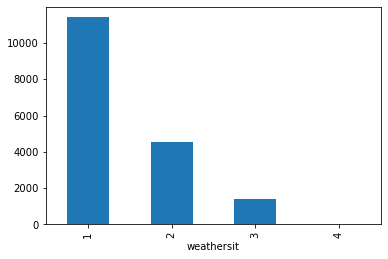

In [49]:
#weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#broj posuđenih bicikala prema vremenskim uvjetima
groupbyWeathersit = df.groupby(by = 'weathersit').size()
groupbyWeathersit.plot.bar()

<AxesSubplot:xlabel='mnth'>

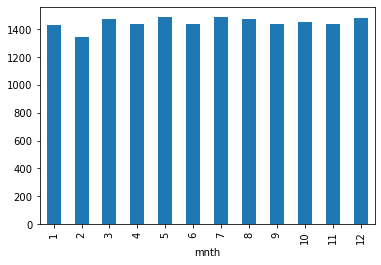

In [50]:
#mnth : month ( 1 to 12)
#broj posuđenih bicikala prema mjesecu
groupbyMnth = df.groupby(by = 'mnth').size()
groupbyMnth.plot.bar()

<AxesSubplot:xlabel='weekday'>

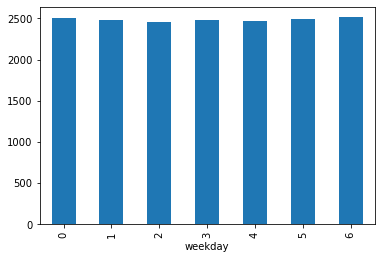

In [51]:
#weekday : day of the week
#broj posuđenih bicikala prema danu u tjednu
groupbyWeekday = df.groupby(by = 'weekday').size()
groupbyWeekday.plot.bar()

<AxesSubplot:xlabel='holiday'>

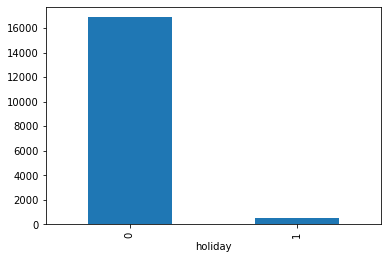

In [52]:
#holiday : weather day is holiday or not
#broj posuđenih bicikala s obzirom na to je li praznik ili ne
groupbyHoliday = df.groupby(by = 'holiday').size()
groupbyHoliday.plot.bar()

<AxesSubplot:xlabel='workingday'>

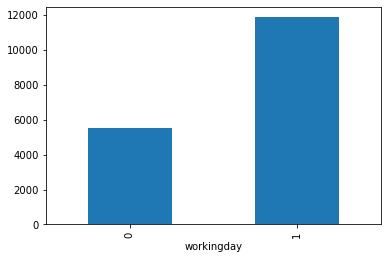

In [53]:
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#broj posuđenih bicikala s obzirom na to je li radni dan ili ne
groupbyWorkingday = df.groupby(by = 'workingday').size()
groupbyWorkingday.plot.bar()

<AxesSubplot:xlabel='hr'>

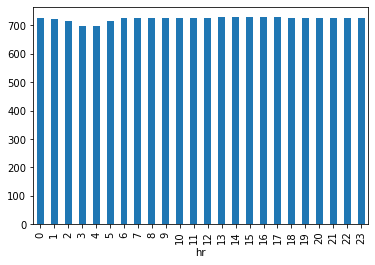

In [54]:
#hr : hour (0 to 23)
#broj posuđenih bicikala prema satu
groupbyHr = df.groupby(by = 'hr').size()
groupbyHr.plot.bar()

# Kontinuirane varijable

In [55]:
#srednja vrijednost
df_con = df[["temp", "atemp", "hum", "windspeed"]]
df_con.describe().loc["mean"]

temp         0.496987
atemp        0.475775
hum          0.627229
windspeed    0.190098
Name: mean, dtype: float64

In [56]:
#z vrijednost
pd.options.mode.chained_assignment = None
for col in df_con.columns:
    col_zscore = col + '_Z_vrijednost'
    df_con[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

df_con.head()

,temp,atemp,hum,windspeed,temp_Z_vrijednost,atemp_Z_vrijednost,hum_Z_vrijednost,windspeed_Z_vrijednost
0,0.24,0.2879,0.81,0.0,-1.334648,-1.093281,0.947372,-1.553889
1,0.22,0.2727,0.80,0.0,-1.438516,-1.181732,0.895539,-1.553889
2,0.22,0.2727,0.80,0.0,-1.438516,-1.181732,0.895539,-1.553889
3,0.24,0.2879,0.75,0.0,-1.334648,-1.093281,0.636370,-1.553889
4,0.24,0.2879,0.75,0.0,-1.334648,-1.093281,0.636370,-1.553889


Z-vrijednost može biti pozitivna ili negativna, ako je vrijednost pozitivna rezultat je iznad srednje vrijednosti, a ako je
negativna rezultat je ispod prosjeka.

In [57]:
#zaobljenost distribucije
df_con = df[["temp", "atemp", "hum", "windspeed"]]
df_con.kurtosis()

temp        -0.941844
atemp       -0.845412
hum         -0.826117
windspeed    0.590820
dtype: float64

-temp, atemp, hum imaju negativnu zaobljenost distribucije 
-windspeed ima pozitivnu zaobljenost

In [58]:
#nagnutost distribucije
df_con = df[["temp", "atemp", "hum", "windspeed"]]
df_con.skew()

temp        -0.006021
atemp       -0.090429
hum         -0.111287
windspeed    0.574905
dtype: float64

-temp, atemp, hum imaju lijevo nagnutu distribuciju
-windspeed ima desno nagnutu distribuciju 

In [59]:
# korelacije svake varijable s ciljnom varijablom
df[df.columns[:]].corr()["cnt"][:]

season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
cnt           1.000000
Name: cnt, dtype: float64

In [60]:
bins = [-float("inf"), -3, 3, float("inf")]
names = ["<-3", "(-3 do 3)", ">3"]

corrs = df[df.columns[:]].corr()["cnt"][:]
pd.cut(((corrs-corrs.mean()) / corrs.std()), bins, labels=names)

season        (-3 do 3)
yr            (-3 do 3)
mnth          (-3 do 3)
hr            (-3 do 3)
holiday       (-3 do 3)
weekday       (-3 do 3)
workingday    (-3 do 3)
weathersit    (-3 do 3)
temp          (-3 do 3)
atemp         (-3 do 3)
hum           (-3 do 3)
windspeed     (-3 do 3)
cnt           (-3 do 3)
Name: cnt, dtype: category
Categories (3, object): ['<-3' < '(-3 do 3)' < '>3']

Z-vrjednost od -3,0 do 3,0 da je rezultat unutar tri standardne devijacije svoje srednje vrijednosti.
Ovdje vidimo da su sve vrijednosti u razredu od -3 do 3.

# IV & WOE

In [61]:
#pretvaranje u kategoričke varijable
df_cat = df[["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "target"]]
for col in df_cat.columns:
    if(col != "target"):
        df_cat[col + "_cat"] = pd.qcut(df_cat[col], 4, duplicates="drop")
        df_cat = df_cat.drop(col, 1).copy()

df_cat.head(100)

C:\Users\mtopalovic\AppData\Local\Temp\ipykernel_23152\2849746627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat = df_cat.drop(col, 1).copy()
C:\Users\mtopalovic\AppData\Local\Temp\ipykernel_23152\2849746627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat = df_cat.drop(col, 1).copy()
C:\Users\mtopalovic\AppData\Local\Temp\ipykernel_23152\2849746627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat = df_cat.drop(col, 1).copy()
C:\Users\mtopalovic\AppData\Local\Temp\ipykernel_23152\2849746627.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat = df_cat.drop(col, 1).copy()
C:\Users\mtopalovic\AppData\Loca

,target,season_cat,yr_cat,mnth_cat,hr_cat,holiday_cat,weekday_cat,workingday_cat,weathersit_cat,temp_cat,atemp_cat,hum_cat,windspeed_cat
0,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(5.0, 6.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(0.78, 1.0]","(-0.001, 0.104]"
1,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(5.0, 6.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(0.78, 1.0]","(-0.001, 0.104]"
2,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(5.0, 6.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(0.78, 1.0]","(-0.001, 0.104]"
3,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(5.0, 6.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(0.63, 0.78]","(-0.001, 0.104]"
4,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(5.0, 6.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(0.63, 0.78]","(-0.001, 0.104]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(-0.001, 0.48]","(0.194, 0.254]"
96,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(-0.001, 0.48]","(0.104, 0.194]"
97,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(-0.001, 6.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(-0.001, 0.48]","(0.194, 0.254]"
98,BELOW_A,"(0.999, 2.0]","(-0.001, 1.0]","(0.999, 4.0]","(6.0, 12.0]","(-0.001, 1.0]","(1.0, 3.0]","(-0.001, 1.0]","(0.999, 2.0]","(0.019, 0.34]","(-0.001, 0.333]","(-0.001, 0.48]","(0.104, 0.194]"


In [62]:
def WoE(varijabla, ciljna):
    IV=pd.crosstab(varijabla,ciljna).apply(lambda c: c/c.sum(), axis=0)
    IV["WoE"] = np.log((IV["ABOVE_A"]/IV["BELOW_A"]) if IV["BELOW_A"].any() else IV["ABOVE_A"])
    IV["IV"] = (IV["ABOVE_A"]-IV["BELOW_A"])* np.log((IV["ABOVE_A"]/IV["BELOW_A"]) if IV["BELOW_A"].any() else IV["ABOVE_A"])
    return IV

IV = pd.DataFrame(columns=["Varijabla", "IV", "Prediktivnost"])
for col in df_cat.columns:
    if(col != "target"):
        iv = WoE(df_cat[col], df_cat.target)["IV"].sum()
        if iv < 0.02:
            prediktivnost = "nema utjecaja"
        elif iv <= 0.1:
            prediktivnost = "slab utjecaj"
        elif iv <= 0.3:
            prediktivnost = "srednji utjecaj"
        elif iv <= 0.5:
            prediktivnost = "jak utjecaj"
        else:
            prediktivnost = "izniman utjecaj"
        
        IV.loc[len(IV)]=[col, iv, prediktivnost]
        
print(IV.sort_values(by="IV", ascending=False))

         Varijabla        IV    Prediktivnost
3           hr_cat  2.896152  izniman utjecaj
8         temp_cat  0.646078  izniman utjecaj
9        atemp_cat  0.624223  izniman utjecaj
10         hum_cat  0.398894      jak utjecaj
2         mnth_cat  0.224400  srednji utjecaj
0       season_cat  0.117802  srednji utjecaj
7   weathersit_cat  0.079219     slab utjecaj
11   windspeed_cat  0.038428     slab utjecaj
5      weekday_cat  0.008802    nema utjecaja
1           yr_cat  0.000000    nema utjecaja
4      holiday_cat  0.000000    nema utjecaja
6   workingday_cat  0.000000    nema utjecaja


WoE grafovi za predikativne varijable:

<AxesSubplot:xlabel='temp_cat'>

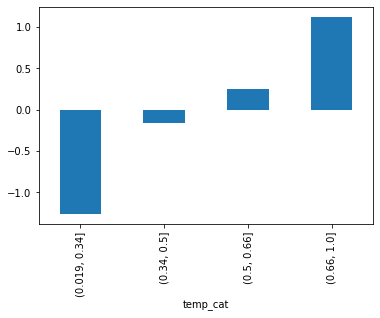

In [63]:
WoE(df_cat.temp_cat, df_cat.target)["WoE"].plot(kind="bar")

<AxesSubplot:xlabel='atemp_cat'>

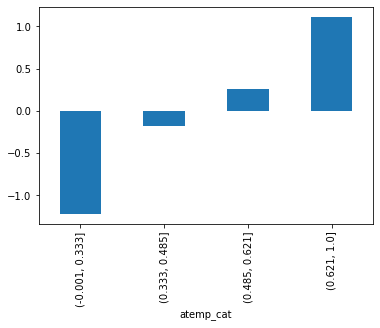

In [64]:
WoE(df_cat.atemp_cat, df_cat.target)["WoE"].plot(kind="bar")

<AxesSubplot:xlabel='hum_cat'>

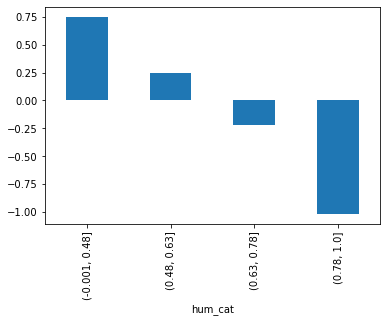

In [65]:
WoE(df_cat.hum_cat, df_cat.target)["WoE"].plot(kind="bar")

<AxesSubplot:xlabel='mnth_cat'>

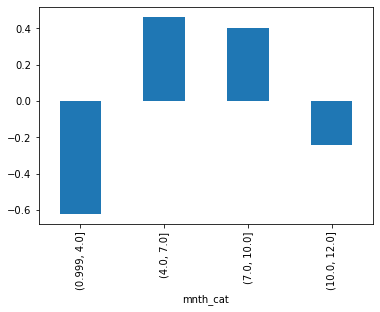

In [66]:
WoE(df_cat.mnth_cat, df_cat.target)["WoE"].plot(kind="bar")

<AxesSubplot:xlabel='season_cat'>

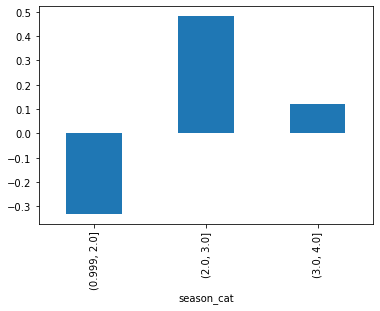

In [67]:
WoE(df_cat.season_cat, df_cat.target)["WoE"].plot(kind="bar")

Analizom ovog dataseta smo htjeli utvrditi stupanj utjecaja raličitih uvjeta na broj unajmljenih bicikala. Utvrđeno je da koji je dan u tjednu, je li radni dan, vikend ili praznik nemaju utjecaj na odluku o najmu bicikla. Brzina vjetra i vremenski uvjeti imaju slab utjecaj, tj. za vrmenske uvjete od četiri odstupne kombinacije jedna(pljusak, tuča, snijeg, jaka magla) nije prihvatljiva korisnicima. Srednji utjecaj imaju godišnja doba i mjeseci u godini. Jak utjecaj ima vlažnost zraka, a najveći utjecaj ima temperatura zraka.
Dostupna mjerenja vremenskih uvjeta provedena su 2011 i 2012 godine, te se dobiveni nalazi ne mogu primjeniti na sadašnje vrijeme usljed klimatskih promjena.